## Data Exploration and Preparation

In [151]:
# join the three datasets based on the common column 'id'
import pandas as pd
import numpy as np

# read DEMO DATA
df = pd.read_csv('DEMO_DATA.csv', delimiter='\t')

# print shape of DEMO DATA
print(df.shape)

# read all lab tests data
from functools import reduce

# Load the lab data data CSV files into a DataFrame called lab tests and separate the features using /t as the delimiter
wbc_df = pd.read_csv('WHITE_BLOOD_CELLS.csv', delimiter='\t')
wbc_df = wbc_df.iloc[:, 1:]

sodium_df = pd.read_csv('SODIUM.csv', delimiter='\t')
sodium_df = sodium_df.iloc[:, 1:]

potassium_df = pd.read_csv('POTASSSIUM.csv', delimiter='\t')
potassium_df = potassium_df.iloc[:, 1:]

platelet_df = pd.read_csv('PLATELET_COUNT.csv', delimiter='\t')
platelet_df = platelet_df.iloc[:, 1:]

hematrocrit_df = pd.read_csv('HEMATROCRIT.csv', delimiter='\t')
hematrocrit_df = hematrocrit_df.iloc[:, 1:]

creatinine_df = pd.read_csv('CREATININE.csv', delimiter='\t')
creatinine_df = creatinine_df.iloc[:, 1:]

blood_urea_df = pd.read_csv('BLOOD_UREA_NITROGEN.csv', delimiter='\t')
blood_urea_df = blood_urea_df.iloc[:, 1:]

blood_glucose_df = pd.read_csv('BLOOD_GLUCOSE.csv', delimiter='\t')
blood_glucose_df = blood_glucose_df.iloc[:, 1:]

bicarbonate_df = pd.read_csv('BICARBONATE.csv', delimiter='\t')
bicarbonate_df = bicarbonate_df.iloc[:, 1:]

albumin_df = pd.read_csv('ALBUMIN.csv', delimiter='\t')
albumin_df = albumin_df.iloc[:, 1:]

lab_dfs = [wbc_df, sodium_df, potassium_df, platelet_df, hematrocrit_df, creatinine_df, 
       blood_urea_df, blood_glucose_df, bicarbonate_df, albumin_df]

# Merge all DataFrames on 'hadm_id' (keeping only common hadm_id values)
lab_tests_df = reduce(lambda left, right: pd.merge(left, right, on='hadm_id', how='inner'), lab_dfs)

# print shape of lab tests
print(lab_tests_df.shape)

# read all vital signs data
art_ph_df = pd.read_csv('ART_PH.csv', delimiter='\t')
art_ph_df = art_ph_df.iloc[:, 1:]

cvp_df = pd.read_csv('CVP.csv', delimiter='\t')
cvp_df = cvp_df.iloc[:, 1:]

dias_df = pd.read_csv('DIAS_PRESS.csv', delimiter='\t')
dias_df = dias_df.iloc[:, 1:]

hr_df = pd.read_csv('HR.csv', delimiter='\t')
hr_df = hr_df.iloc[:, 1:]

spo_df = pd.read_csv('SPO2.csv', delimiter='\t')
spo_df = spo_df.iloc[:, 1:]

sys_df = pd.read_csv('SYS_PRESS.csv', delimiter='\t')
sys_df = sys_df.iloc[:, 1:]

vital_dfs = [art_ph_df, cvp_df, dias_df, hr_df, spo_df, sys_df]

# Merge all DataFrames on 'hadm_id' (keeping only common hadm_id values)
vital_signs_df = reduce(lambda left, right: pd.merge(left, right, on='hadm_id', how='inner'), vital_dfs)

# print shape of vital signs
print(vital_signs_df.shape)

# Merge all DataFrames on 'hadm_id' (keeping only common hadm_id values)
all_data = pd.merge(df, lab_tests_df, on='hadm_id', how='inner')
all_data = pd.merge(all_data, vital_signs_df, on='hadm_id', how='inner')

# print shape of all data
print(all_data.shape)

(58976, 7)
(30816, 21)
(57804, 13)
(30608, 39)


In [152]:
# handle missing values
missing_values_demo = all_data.isnull().sum()

# Display the number of missing values per column
print(missing_values_demo)

Unnamed: 0                     0
hadm_id                        0
age                            0
gender                         0
marital_status                 0
religion                       0
ethnicity                      0
avg_white_blood_cells          0
std_white_blood_cells        196
avg_sodium                     0
std_sodium                   212
avg_potasssium                 0
std_potasssium               210
avg_platelet_count             0
std_platelet_count           199
avg_hematrocrit                0
std_hematrocrit              168
avg_creatinine                 0
std_creatinine               182
avg_blood_urea_nitrogen        0
std_blood_urea_nitrogen      179
avg_blood_glucose              0
std_blood_glucose            179
avg_bicarbonate                1
std_bicarbonate              220
avg_albumin                    4
std_albumin                14480
avg_art_ph                 19146
std_art_ph                 20660
avg_cvp                    17375
std_cvp   

<Axes: >

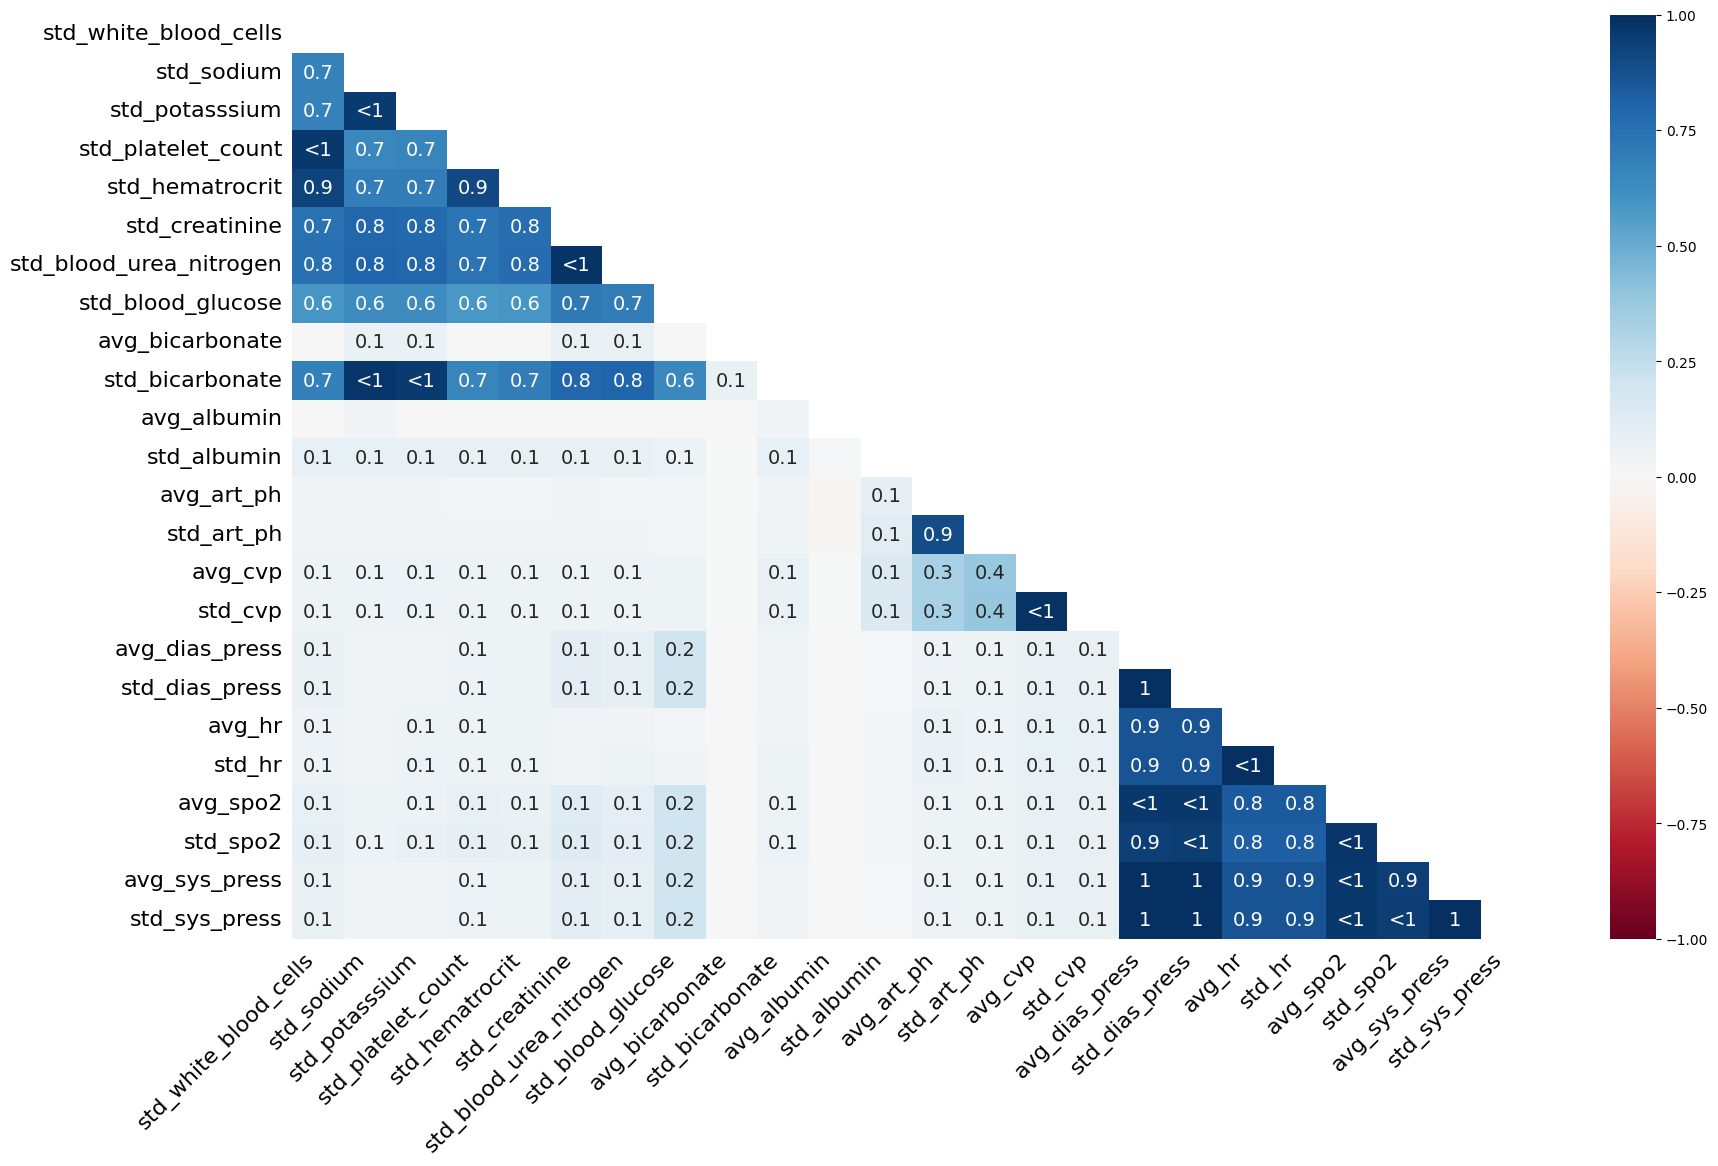

In [153]:
# explore the reason for missing values
import missingno as msno
msno.heatmap(all_data)

In [154]:
# handling missing values using different techniques
# if 70% of the data is missing, drop the column
threshold = 0.4
all_data = all_data[all_data.columns[all_data.isnull().mean() < threshold]]

# drop rows with missing values
all_data = all_data.dropna()

# display number of missing values
missing_values_demo = all_data.isnull().sum()
print(missing_values_demo)
print(all_data.shape)

Unnamed: 0                 0
hadm_id                    0
age                        0
gender                     0
marital_status             0
religion                   0
ethnicity                  0
avg_white_blood_cells      0
std_white_blood_cells      0
avg_sodium                 0
std_sodium                 0
avg_potasssium             0
std_potasssium             0
avg_platelet_count         0
std_platelet_count         0
avg_hematrocrit            0
std_hematrocrit            0
avg_creatinine             0
std_creatinine             0
avg_blood_urea_nitrogen    0
std_blood_urea_nitrogen    0
avg_blood_glucose          0
std_blood_glucose          0
avg_bicarbonate            0
std_bicarbonate            0
avg_albumin                0
avg_dias_press             0
std_dias_press             0
avg_hr                     0
std_hr                     0
avg_spo2                   0
std_spo2                   0
avg_sys_press              0
std_sys_press              0
dtype: int64
(

/var/folders/qf/m5968pjn2nl3_n7rcxrcdfp40000gn/T/ipykernel_90097/3897067415.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_data["marital_status"], ax=axes[0,2], palette="viridis")
/var/folders/qf/m5968pjn2nl3_n7rcxrcdfp40000gn/T/ipykernel_90097/3897067415.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_data["religion"], ax=axes[1,0], palette="viridis")
/var/folders/qf/m5968pjn2nl3_n7rcxrcdfp40000gn/T/ipykernel_90097/3897067415.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_data["ethnicity"], ax=axes[1

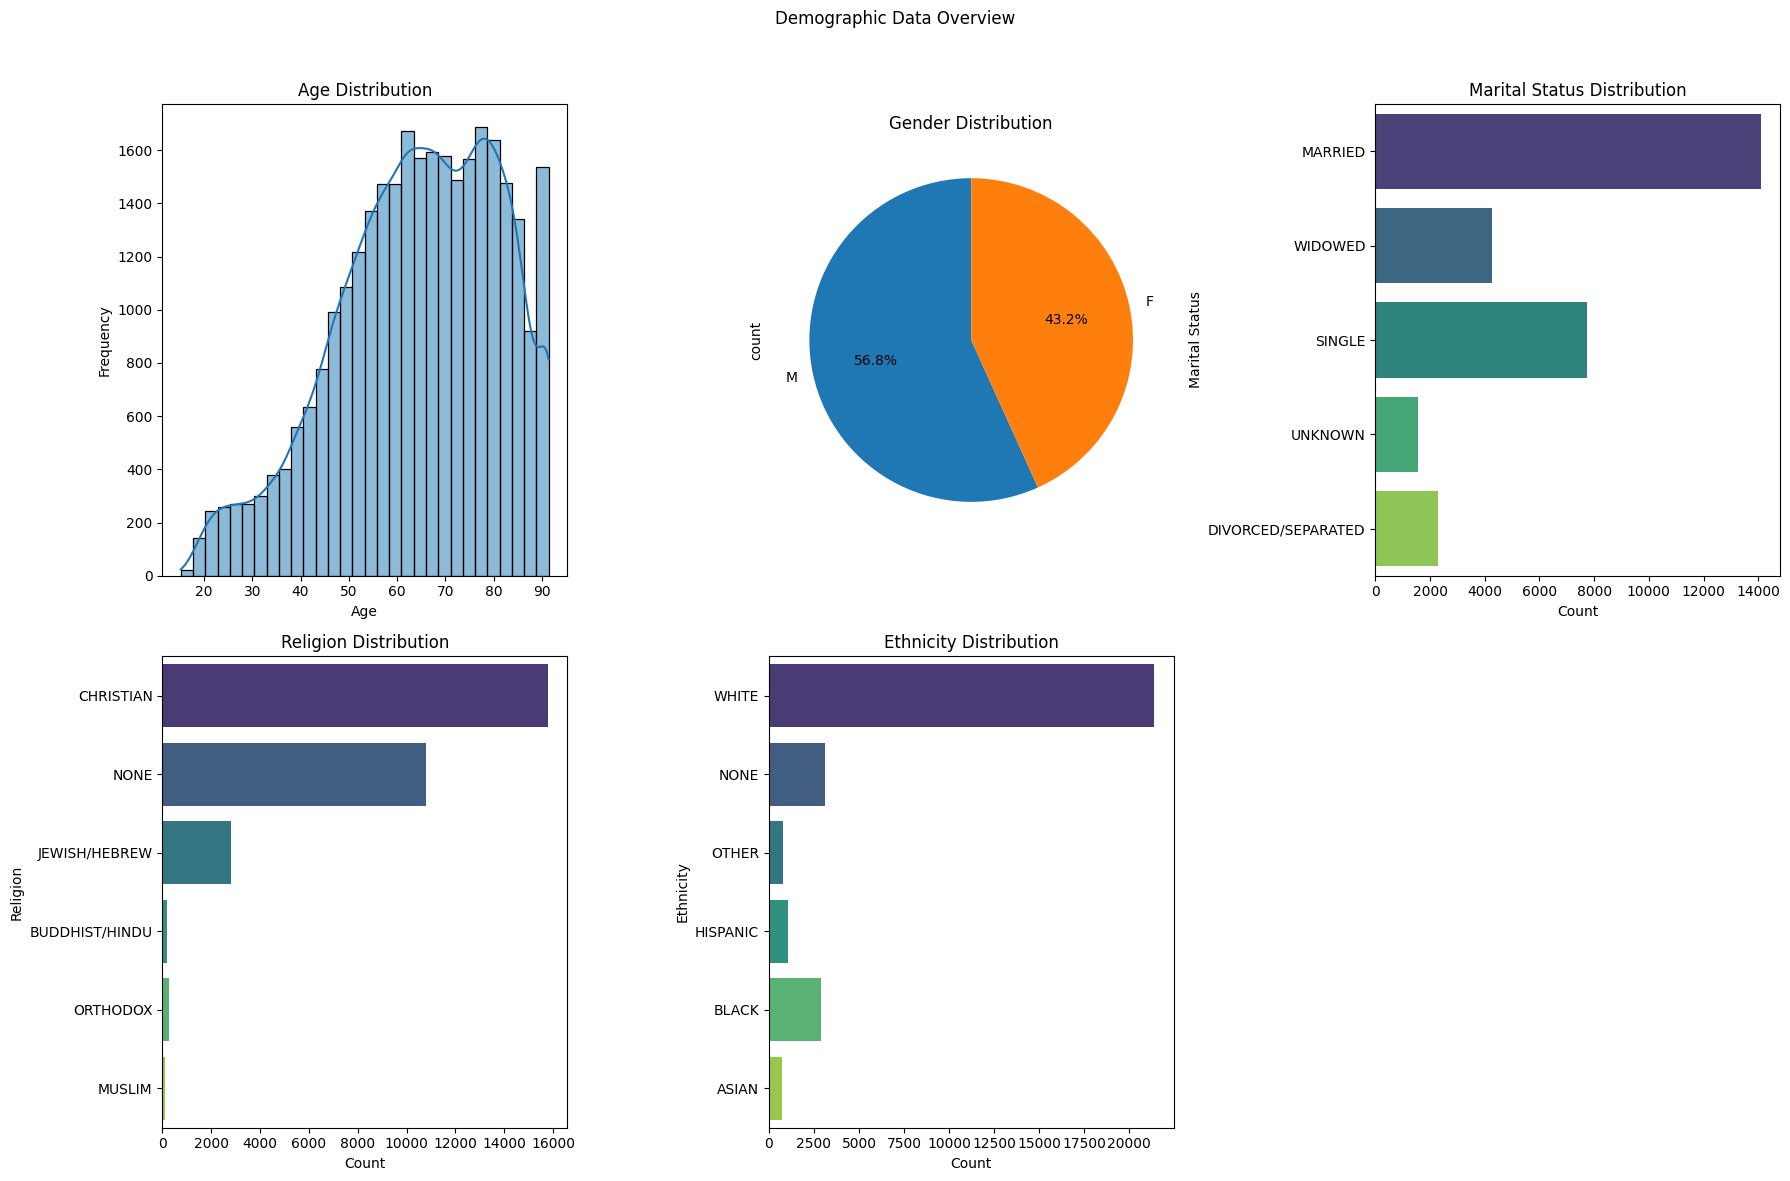

In [155]:
# Do data visualizations to understand the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots 
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) 
fig.suptitle("Demographic Data Overview")

# 1. Age Distribution Histogram
sns.histplot(all_data["age"], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Frequency")

# 2. Gender Pie Chart
all_data["gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[0,1])
axes[0,1].set_title("Gender Distribution")

# 3. Marital Status Bar Chart
sns.countplot(y=all_data["marital_status"], ax=axes[0,2], palette="viridis")
axes[0,2].set_title("Marital Status Distribution")
axes[0,2].set_xlabel("Count")
axes[0,2].set_ylabel("Marital Status")

# 4. Religion Distribution Bar Chart
sns.countplot(y=all_data["religion"], ax=axes[1,0], palette="viridis")
axes[1,0].set_title("Religion Distribution")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Religion")

# 5. Ethnicity Distribution Bar Chart
sns.countplot(y=all_data["ethnicity"], ax=axes[1,1], palette="viridis")
axes[1,1].set_title("Ethnicity Distribution")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Ethnicity")

# Adjust layout
axes[1,2].axis("off")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/qf/m5968pjn2nl3_n7rcxrcdfp40000gn/T/ipykernel_90097/1639768873.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_data["marital_status"], ax=axes[0,2], palette="viridis")
/var/folders/qf/m5968pjn2nl3_n7rcxrcdfp40000gn/T/ipykernel_90097/1639768873.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_data["religion"], ax=axes[1,0], palette="viridis")
/var/folders/qf/m5968pjn2nl3_n7rcxrcdfp40000gn/T/ipykernel_90097/1639768873.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_data["ethnicity"], ax=axes[1

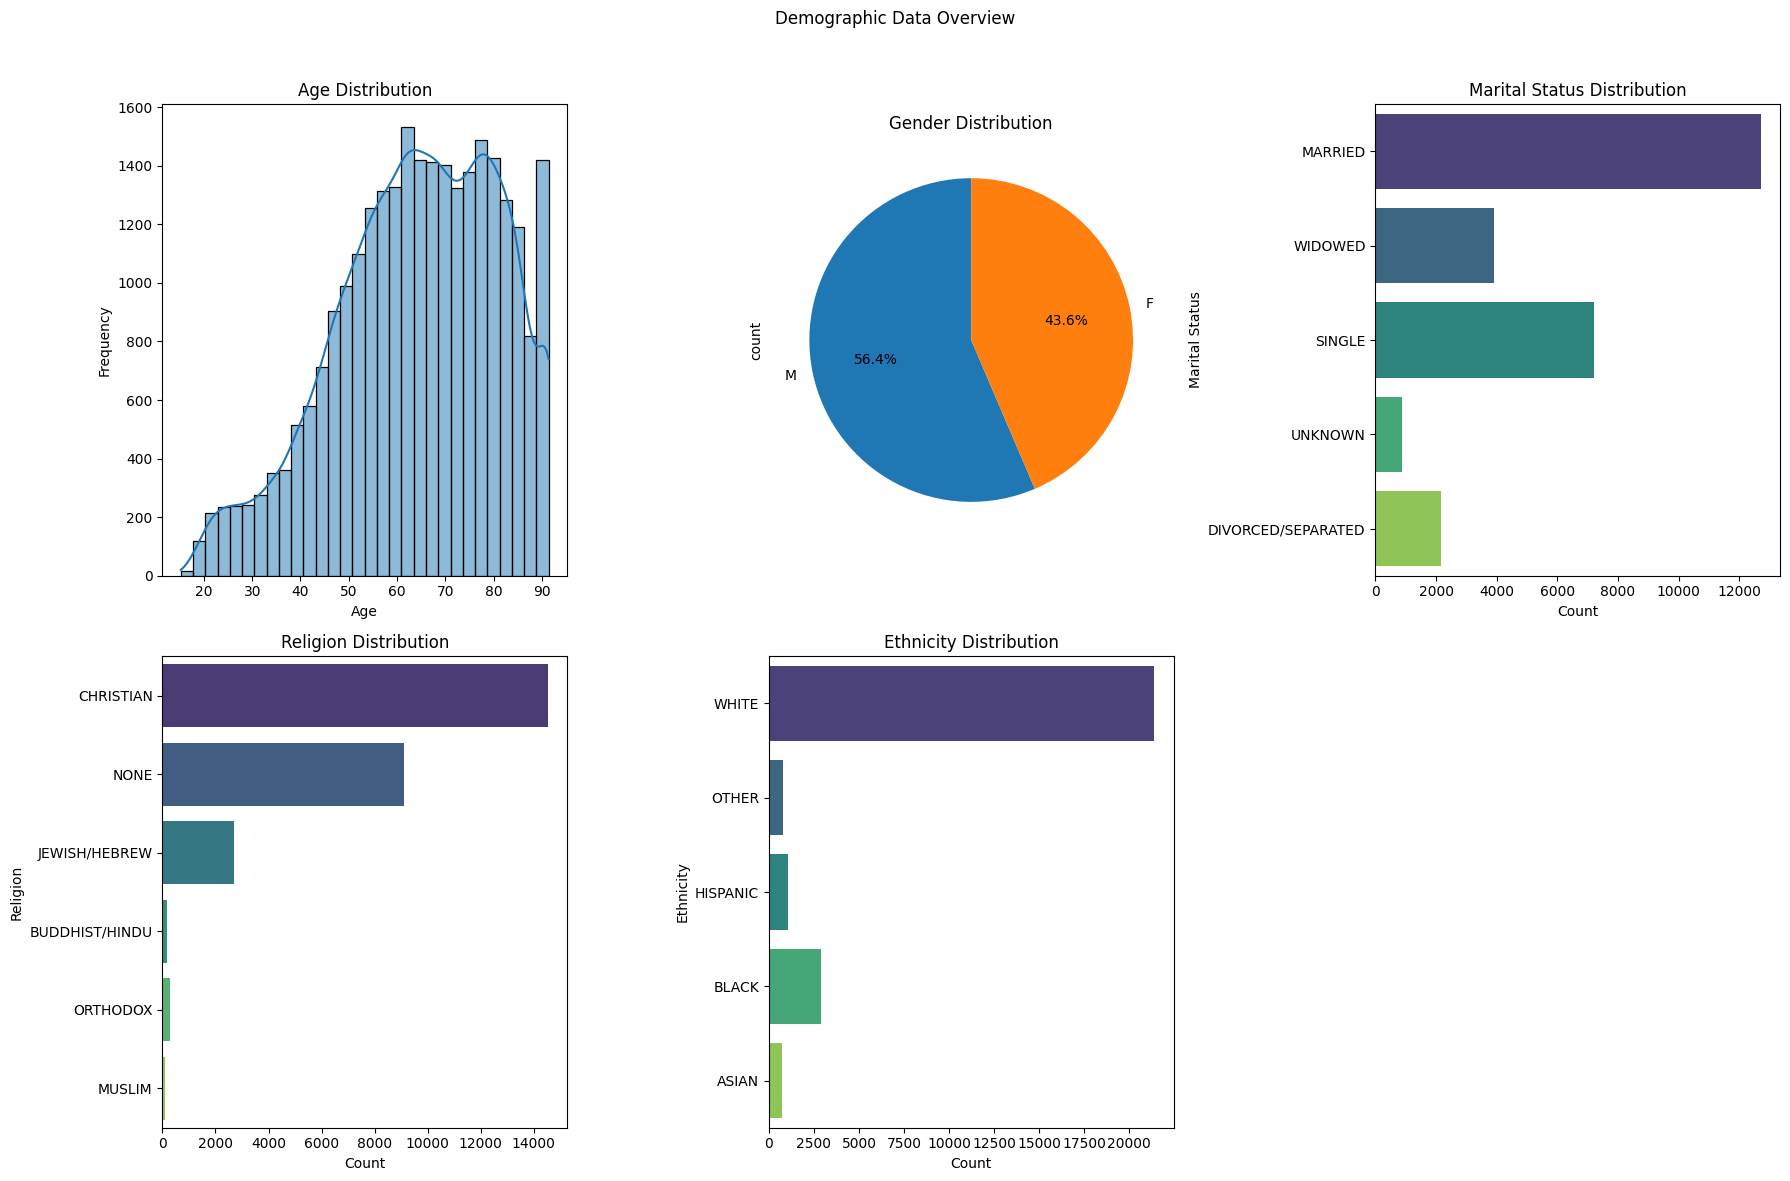

In [156]:
# remove NONE from ethnicity distribution
all_data = all_data[all_data["ethnicity"].str.lower() != "none"]

# Do data visualizations to understand the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots 
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) 
fig.suptitle("Demographic Data Overview")

# 1. Age Distribution Histogram
sns.histplot(all_data["age"], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Frequency")

# 2. Gender Pie Chart
all_data["gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[0,1])
axes[0,1].set_title("Gender Distribution")

# 3. Marital Status Bar Chart
sns.countplot(y=all_data["marital_status"], ax=axes[0,2], palette="viridis")
axes[0,2].set_title("Marital Status Distribution")
axes[0,2].set_xlabel("Count")
axes[0,2].set_ylabel("Marital Status")

# 4. Religion Distribution Bar Chart
sns.countplot(y=all_data["religion"], ax=axes[1,0], palette="viridis")
axes[1,0].set_title("Religion Distribution")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Religion")

# 5. Ethnicity Distribution Bar Chart
sns.countplot(y=all_data["ethnicity"], ax=axes[1,1], palette="viridis")
axes[1,1].set_title("Ethnicity Distribution")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Ethnicity")

# Adjust layout
axes[1,2].axis("off")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [158]:
# to normalize the data first encode the categorical data using label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['gender', 'marital_status', 'ethnicity', 'religion']

# Apply LabelEncoder to each column
for col in categorical_cols:
    all_data[col] = encoder.fit_transform(all_data[col])

print(all_data.head())


   Unnamed: 0  hadm_id        age  gender  marital_status  religion  \
0           2   124321  75.306343       1               1         1   
1           4   129635  58.989281       1               1         4   
3           9   128652  72.315006       1               1         1   
5          12   115799  91.400000       1               1         1   
6          15   182104  69.746033       1               1         4   

   ethnicity  avg_white_blood_cells  std_white_blood_cells  avg_sodium  ...  \
0          4              12.162500               2.969818  139.250000  ...   
1          4              10.571429               2.232125  136.555556  ...   
3          4              11.720000               5.829008  135.166667  ...   
5          4               9.433333               1.446836  140.666667  ...   
6          4              10.666667               4.813523  139.666667  ...   

   std_bicarbonate  avg_albumin  avg_dias_press  std_dias_press     avg_hr  \
0         1.669046  

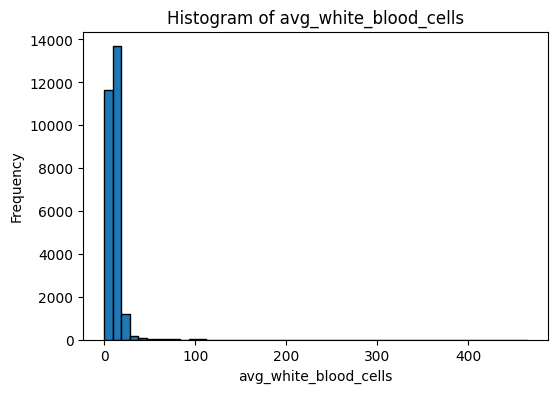

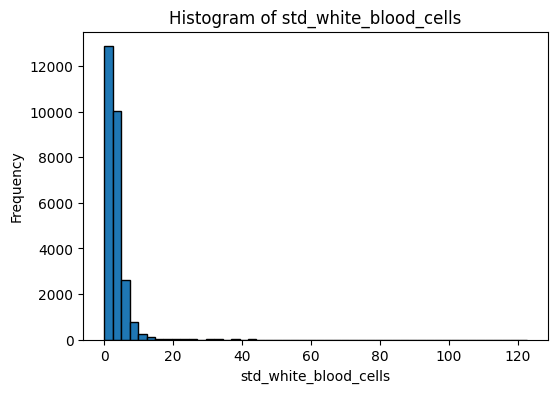

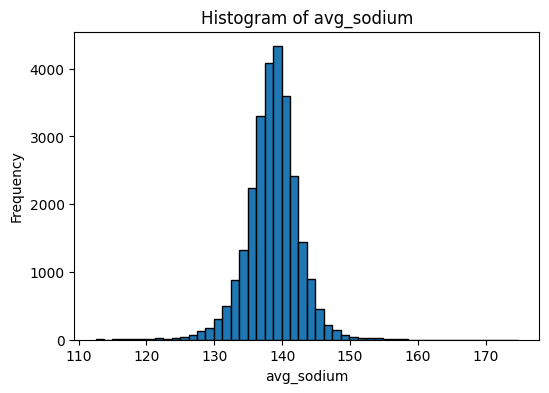

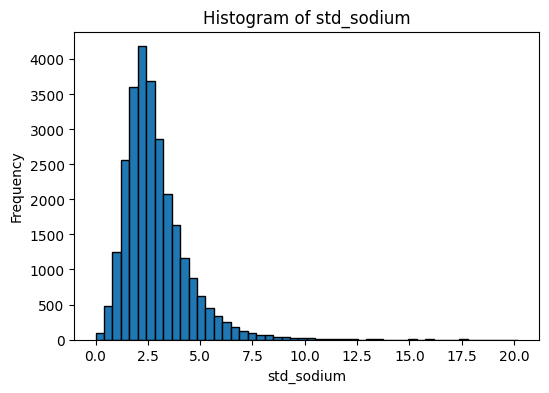

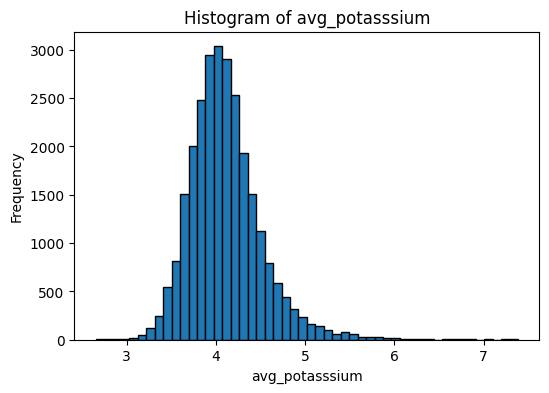

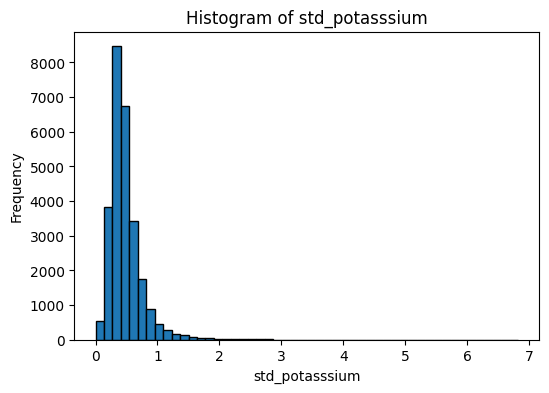

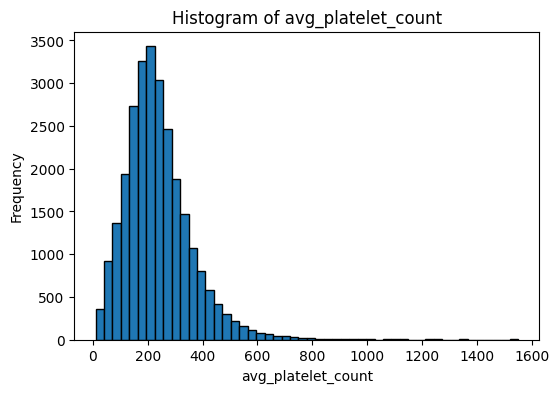

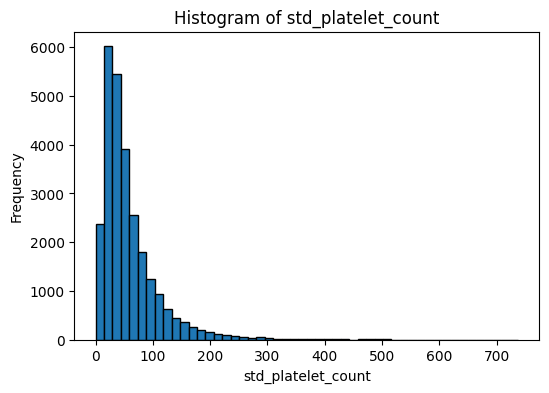

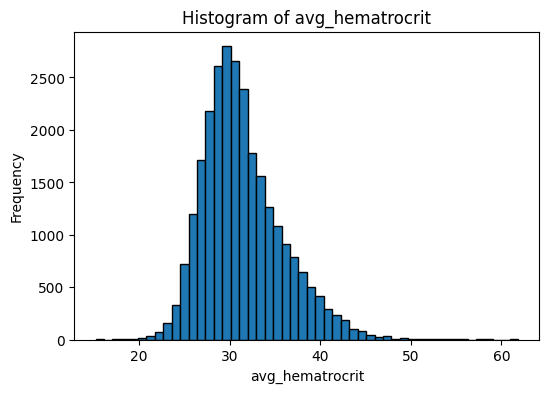

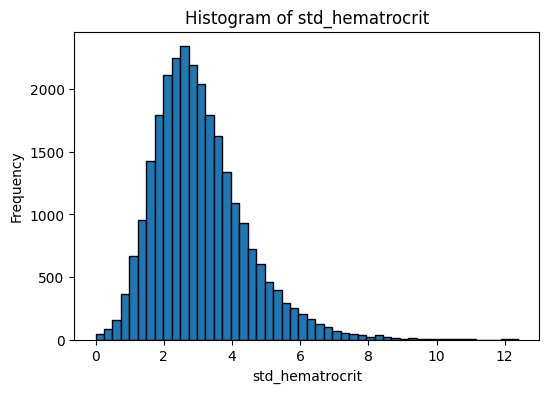

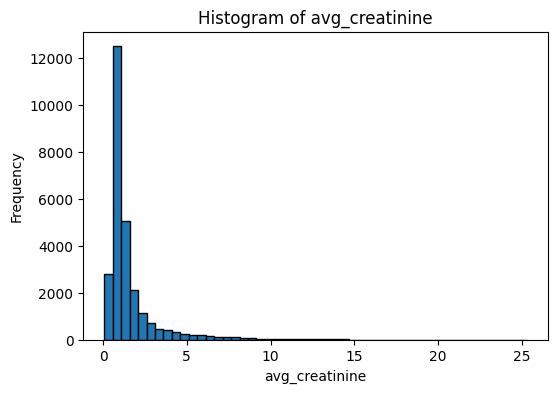

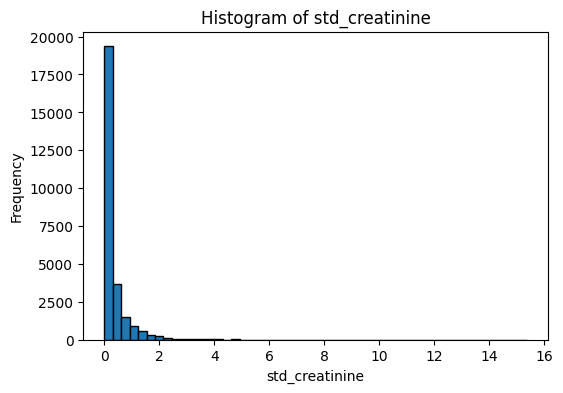

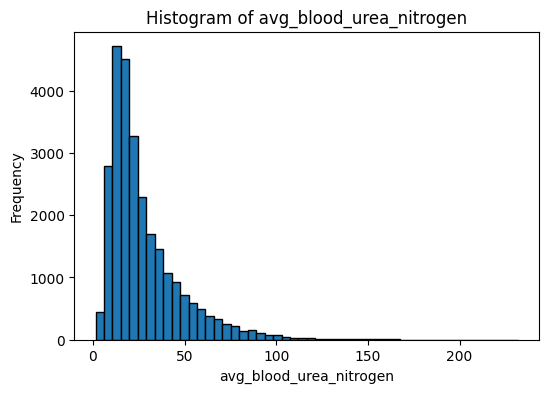

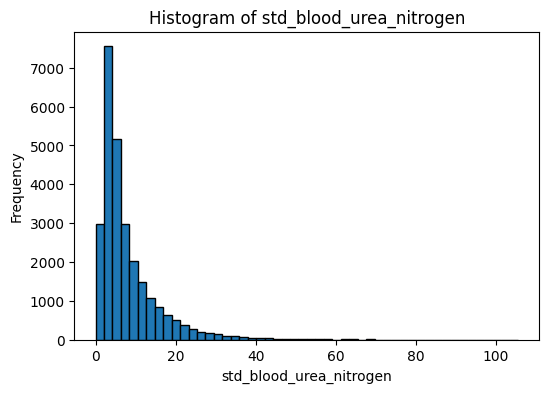

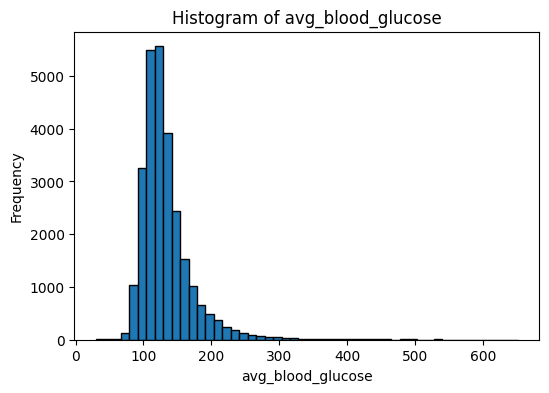

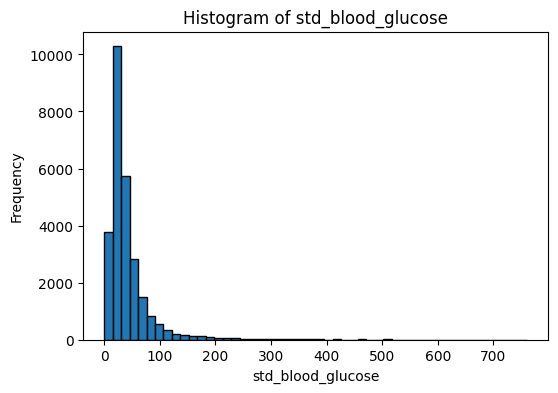

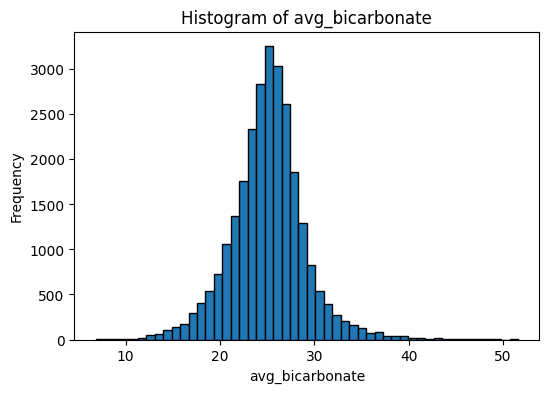

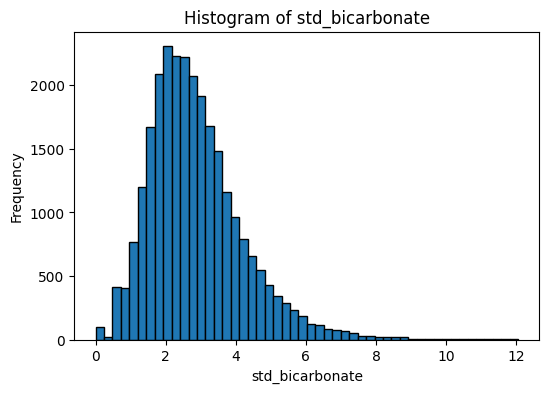

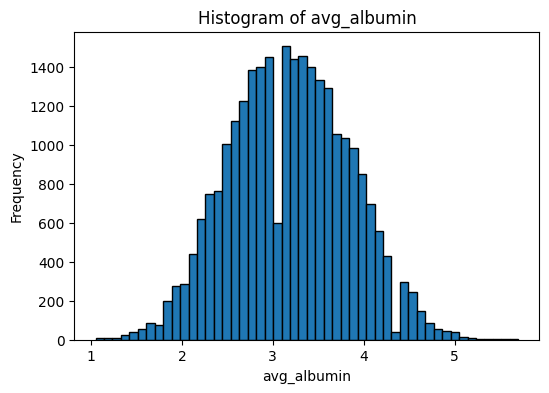

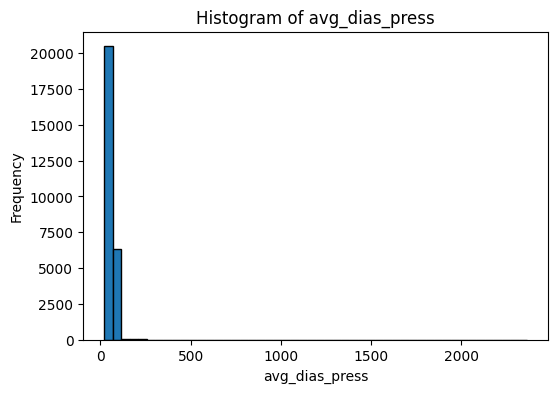

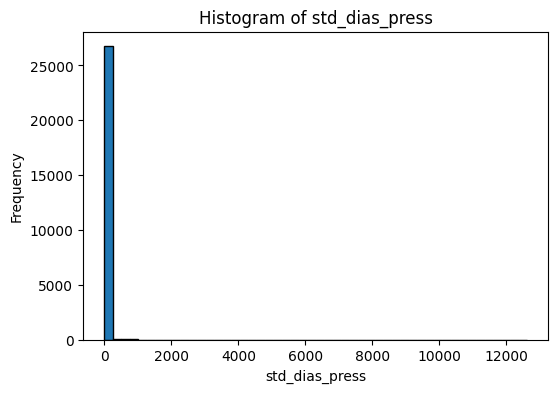

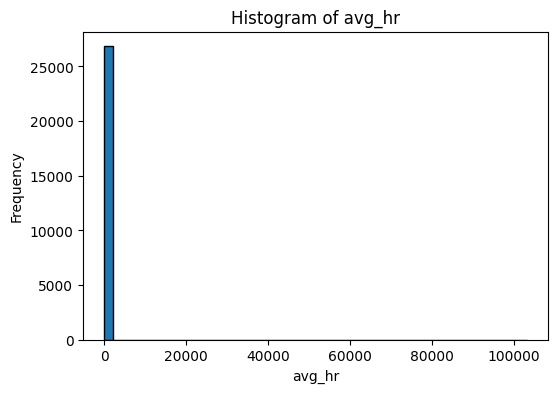

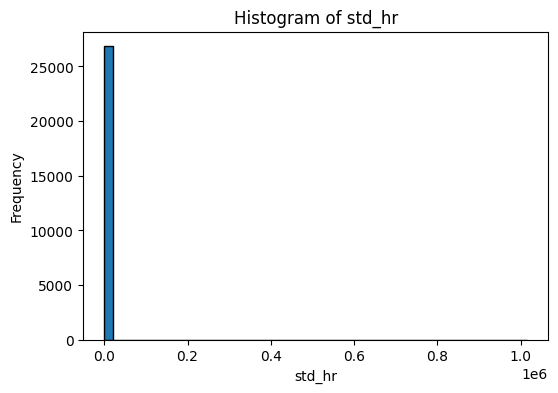

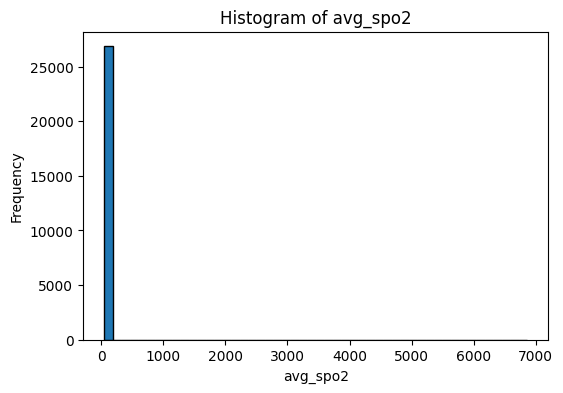

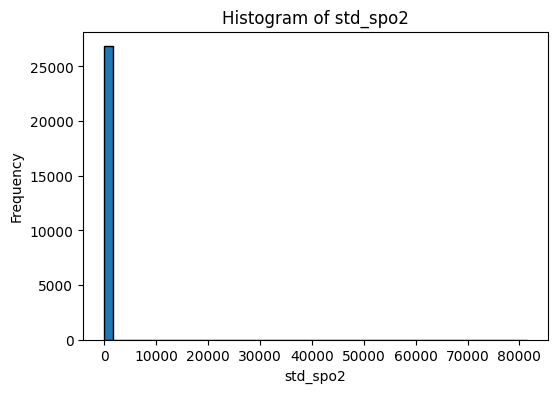

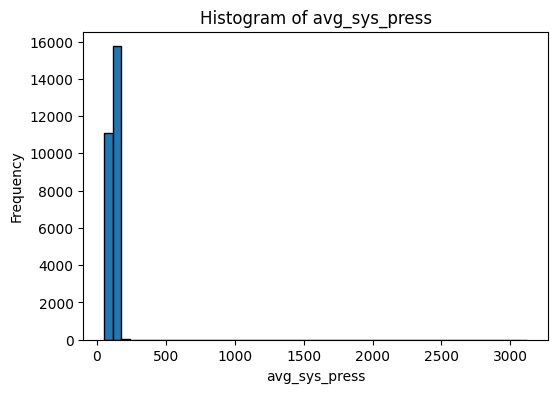

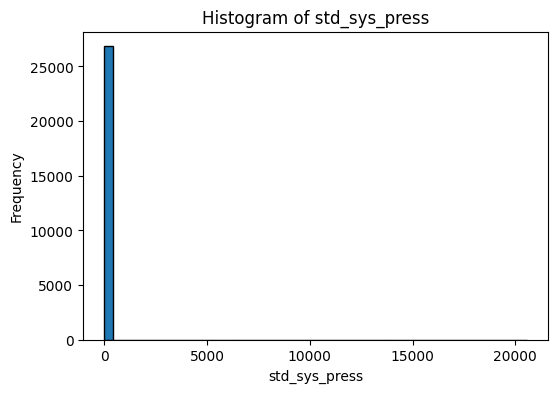

In [ ]:
# check if data is normally distributed
import matplotlib.pyplot as plt

columns = [ 
    "avg_white_blood_cells", "std_white_blood_cells", "avg_sodium", "std_sodium", 
    "avg_potasssium", "std_potasssium", "avg_platelet_count", "std_platelet_count",
    "avg_hematrocrit", "std_hematrocrit", "avg_creatinine", "std_creatinine",
    "avg_blood_urea_nitrogen", "std_blood_urea_nitrogen", "avg_blood_glucose",
    "std_blood_glucose", "avg_bicarbonate", "std_bicarbonate", "avg_albumin",
    "avg_dias_press", "std_dias_press", "avg_hr", "std_hr", "avg_spo2", 
    "std_spo2", "avg_sys_press", "std_sys_press"
]

for col in columns:
    plt.figure(figsize=(6,4))
    plt.hist(all_data[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



In [173]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Columns to normalize (all continuous numerical attributes)
numerical_cols = [
    "avg_white_blood_cells", "std_white_blood_cells", "avg_sodium", "std_sodium",
    "avg_potasssium", "std_potasssium", "avg_platelet_count", "std_platelet_count",
    "avg_hematrocrit", "std_hematrocrit", "avg_creatinine", "std_creatinine",
    "avg_blood_urea_nitrogen", "std_blood_urea_nitrogen", "avg_blood_glucose",
    "std_blood_glucose", "avg_bicarbonate", "std_bicarbonate", "avg_albumin",
    "avg_dias_press", "std_dias_press", "avg_hr", "std_hr", "avg_spo2",
    "std_spo2", "avg_sys_press", "std_sys_press"
]

# Standardize (Z-score normalization)
scaler = StandardScaler()
all_data[numerical_cols] = scaler.fit_transform(all_data[numerical_cols])

# Clip values to fall within -3 and 3
all_data[numerical_cols] = np.clip(all_data[numerical_cols], -3, 3)

# Display the first 5 rows of the dataset
print(all_data.head())


   Unnamed: 0  hadm_id        age  gender  marital_status  religion  \
0           2   124321  75.306343       1               1         1   
1           4   129635  58.989281       1               1         4   
3           9   128652  72.315006       1               1         1   
5          12   115799  91.400000       1               1         1   
6          15   182104  69.746033       1               1         4   

   ethnicity  avg_white_blood_cells  std_white_blood_cells  avg_sodium  ...  \
0          4               0.289974              -0.046522    0.176269  ...   
1          4              -0.035113              -0.385948   -0.568853  ...   
3          4               0.199562               1.269042   -0.952936  ...   
5          4              -0.267649              -0.747274    0.568033  ...   
6          4              -0.015654               0.801799    0.291494  ...   

   std_bicarbonate  avg_albumin  avg_dias_press  std_dias_press    avg_hr  \
0        -0.920763   

## Clustering Implementation

#### A. K-means

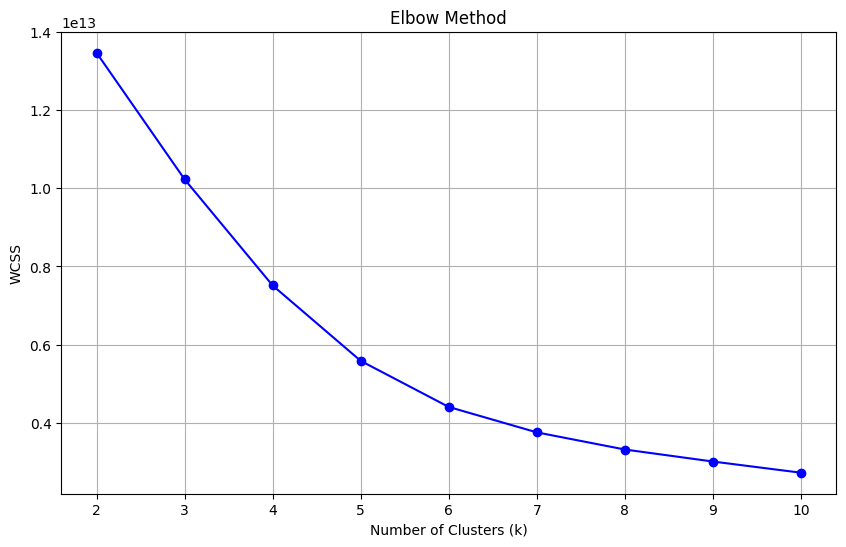

In [174]:
# use elbow method to determine the number of clusters
from sklearn.cluster import KMeans

# calculate within cluster sum of squares (wcss) for k values from 2 to 10
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(all_data)
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

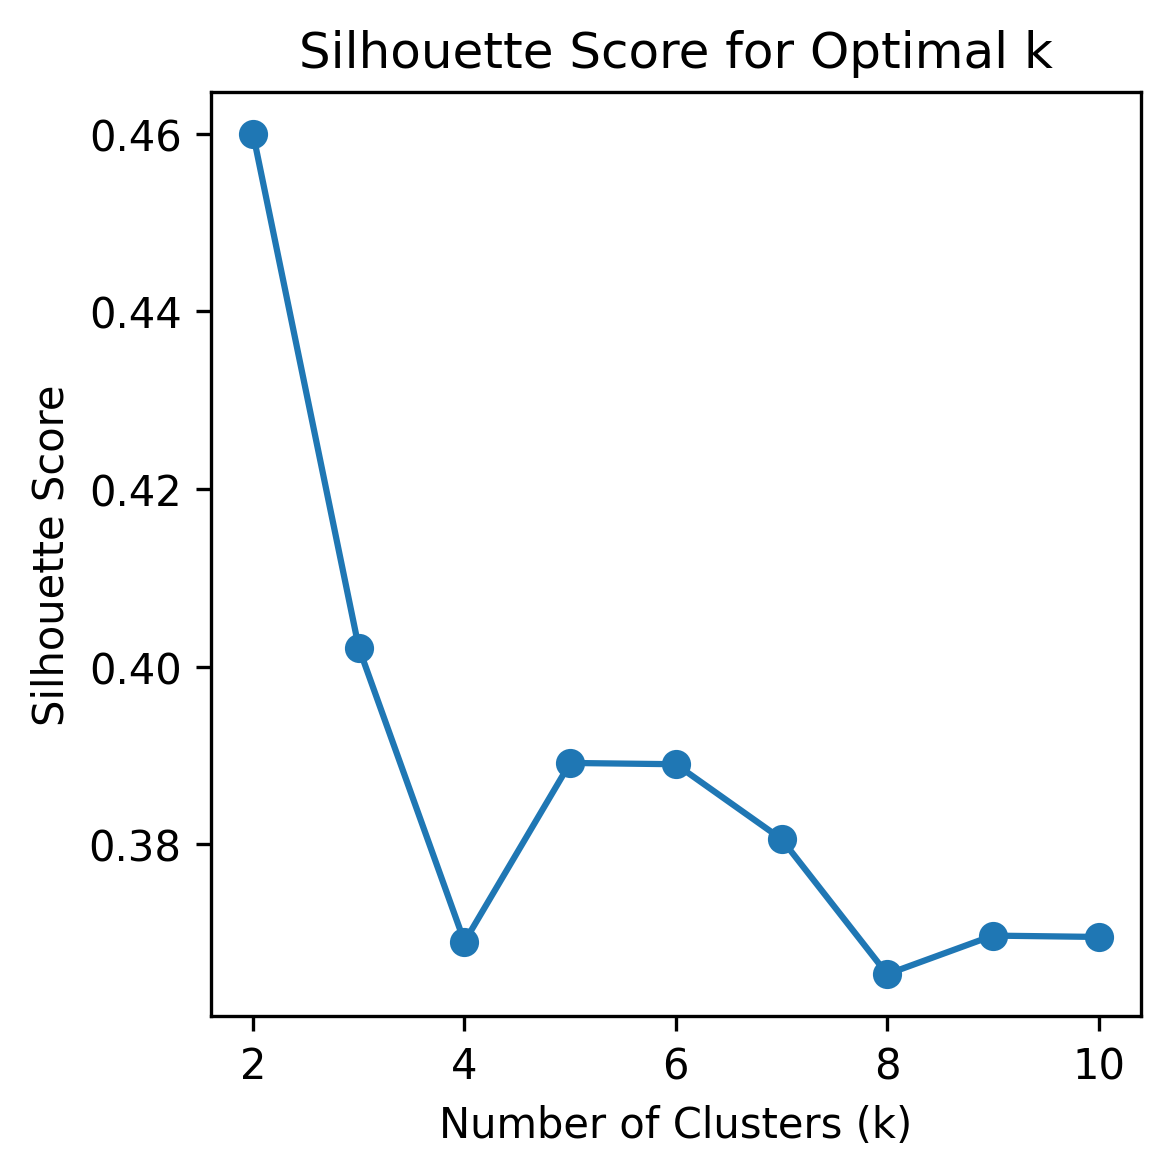

In [175]:
# use sillhouette score to determine the number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    labels = kmeans.fit_predict(all_data)
    silhouette_scores.append(silhouette_score(all_data, labels))

# Plot Silhouette Score vs. k
plt.figure(figsize=(4, 4), dpi = 300)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

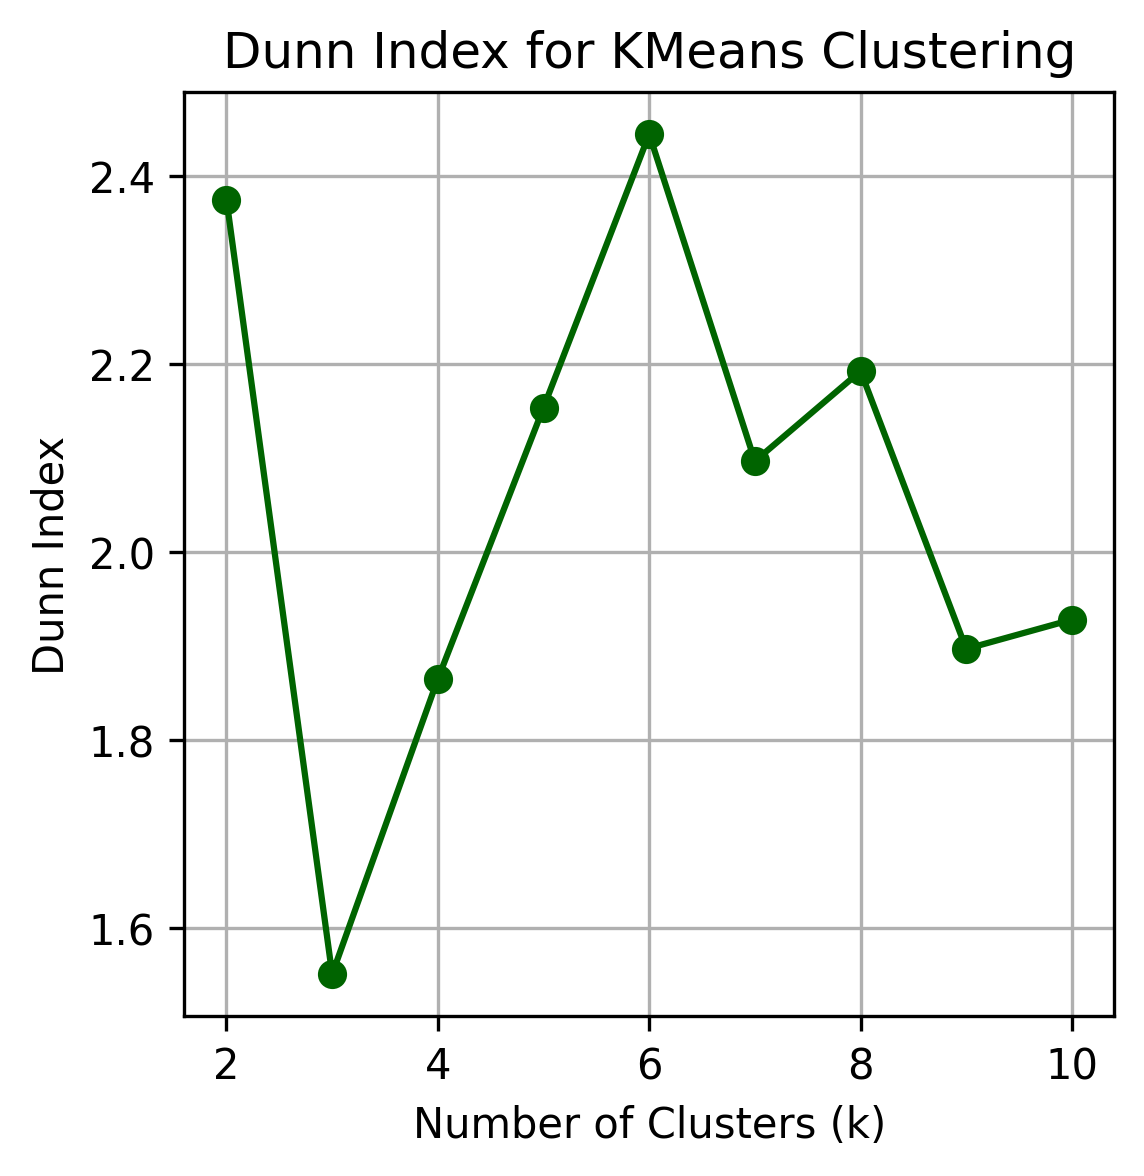

In [176]:
# Calculate the Dunn Index
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

def dunn_index(all_data, labels, centroids):
    # Calculate pairwise distances between all points
    intra_distances = []
    inter_distances = []

    # Group points by cluster
    for k in np.unique(labels):
        cluster_points = all_data[labels == k]
        intra_distances.append(np.mean(cdist(cluster_points, [centroids[k]])))

    # Calculate inter-cluster distances (between centroids)
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            inter_distances.append(np.linalg.norm(centroids[i] - centroids[j]))

    # Dunn index formula: (min inter-cluster distance) / (max intra-cluster distance)
    return min(inter_distances) / max(intra_distances)

# Calculate Dunn Index for k values from 2 to 10
dunn_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(all_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    dunn_score = dunn_index(all_data, labels, centroids)
    dunn_scores.append(dunn_score)

# Plot the Dunn Index scores
plt.figure(figsize=(4, 4), dpi = 300)
plt.plot(k_values, dunn_scores, marker='o', linestyle='-', color='darkgreen')
plt.title('Dunn Index for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Dunn Index')
plt.grid(True)
plt.show()

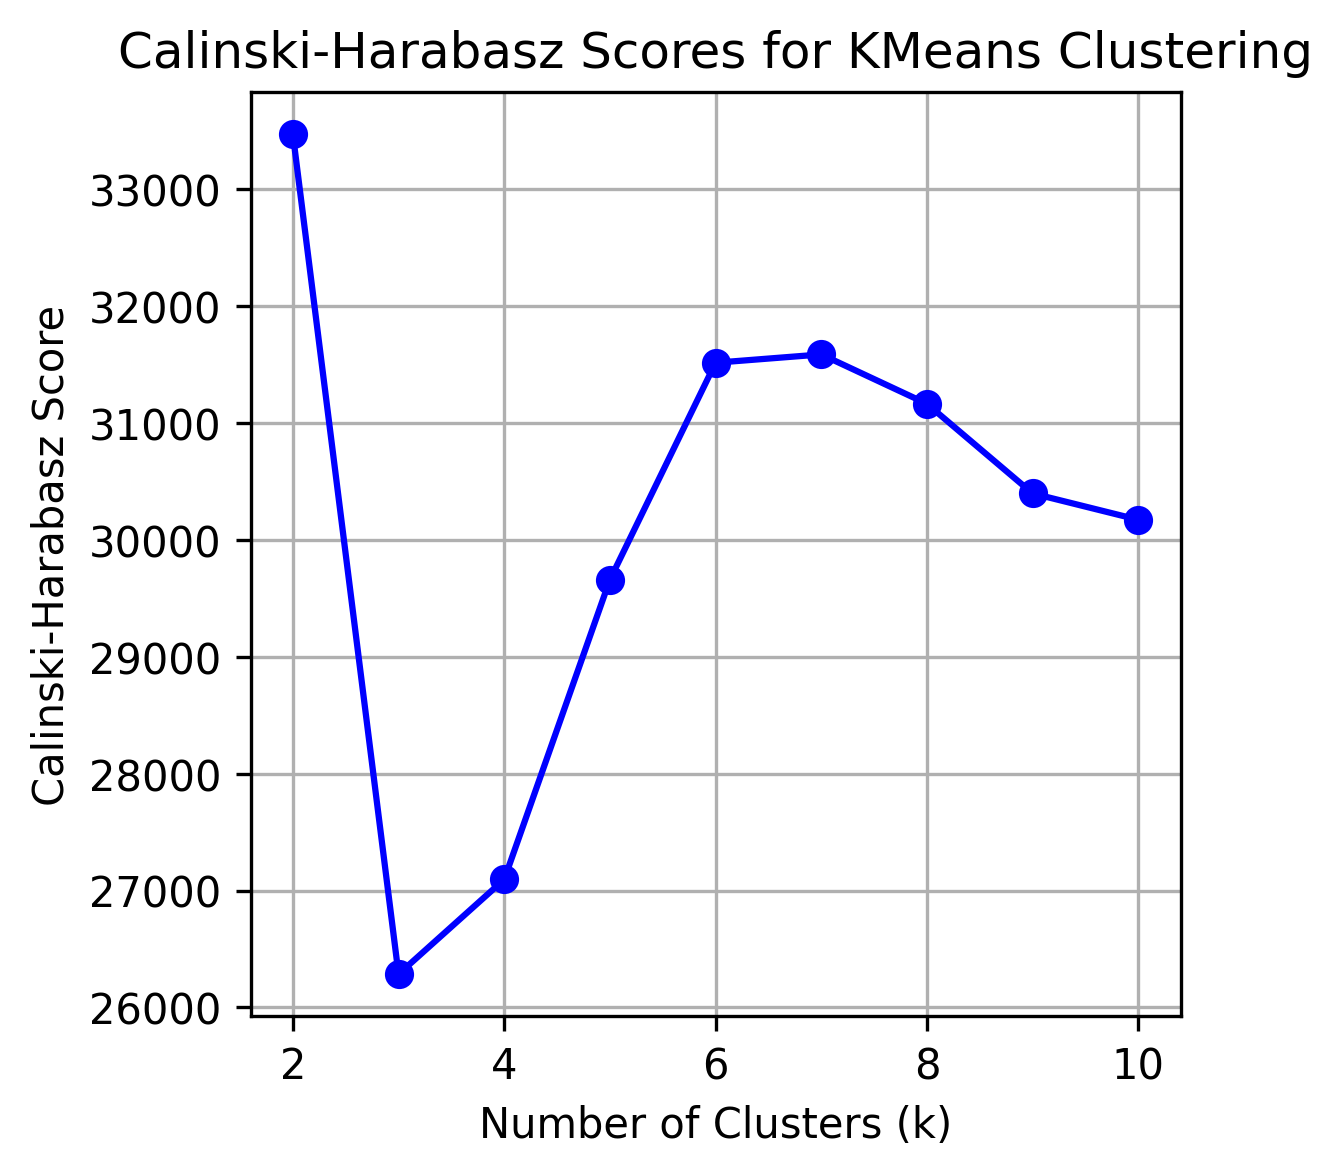

In [177]:
# Calculate the CH coefficient
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz (CH) scores for k values from 2 to 10
ch_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_data)
    score = calinski_harabasz_score(all_data, kmeans.labels_)
    ch_scores.append(score)

# Plot the CH scores
plt.figure(figsize=(4, 4), dpi = 300)
plt.plot(k_values, ch_scores, marker='o', linestyle='-', color='blue')
plt.title('Calinski-Harabasz Scores for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

In [178]:
all_data.to_csv('all_data.csv', index=False)

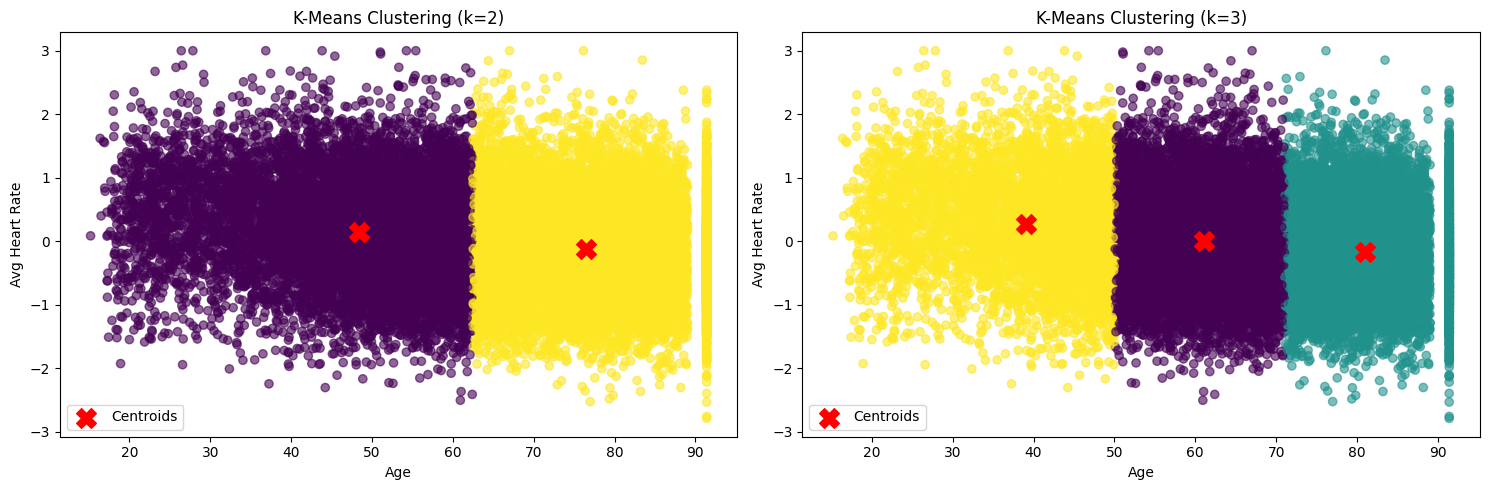

In [183]:
# Investigating age vs. blood pressure and age vs. heart rate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choose two features for clustering (change these as needed)
X = all_data[['age', 'avg_hr']].values  

# Define the number of clusters to test
k_values = [2, 3]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, k in enumerate(k_values):
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Scatter plot
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', label='Centroids')
    
    # Labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Avg Heart Rate')
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.legend()

# Show plots
plt.tight_layout()
plt.show()



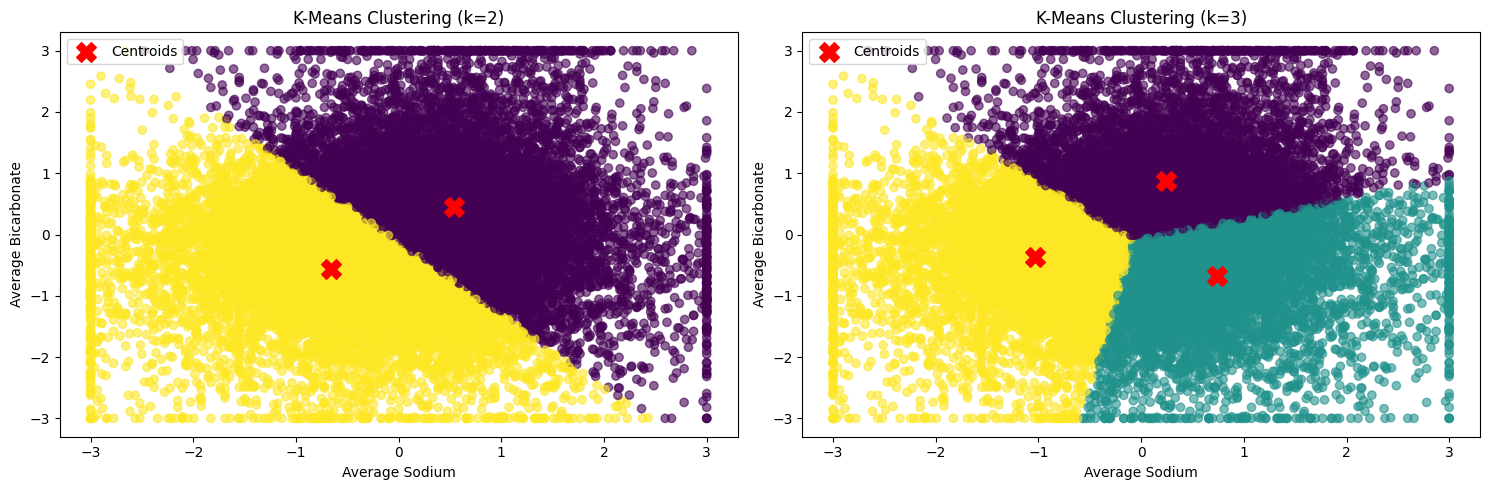

In [192]:
# Blood composition analysis
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choose two features for clustering (change these as needed)
X = all_data[['avg_sodium', 'avg_bicarbonate']].values  

# Define the number of clusters to test
k_values = [2, 3]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, k in enumerate(k_values):
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Scatter plot
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', label='Centroids')
    
    # Labels and title
    ax.set_xlabel('Average Sodium')
    ax.set_ylabel('Average Bicarbonate')
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.legend()

# Show plots
plt.tight_layout()
plt.show()


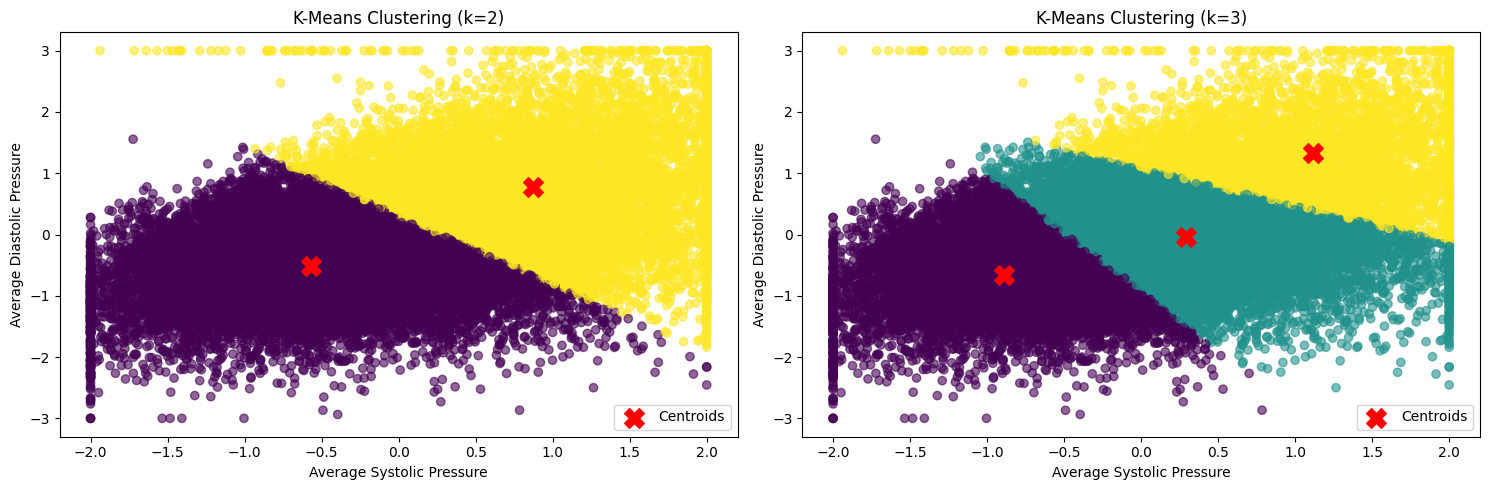

In [193]:
# Investigating hypertensive clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choose two features for clustering (change these as needed)
X = all_data[['avg_sys_press', 'avg_dias_press']].values  

# Define the number of clusters to test
k_values = [2, 3]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, k in enumerate(k_values):
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Scatter plot
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', label='Centroids')
    
    # Labels and title
    ax.set_xlabel('Average Systolic Pressure')
    ax.set_ylabel('Average Diastolic Pressure')
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.legend()

# Show plots
plt.tight_layout()
plt.show()


#### B. Hierarchical Clustering

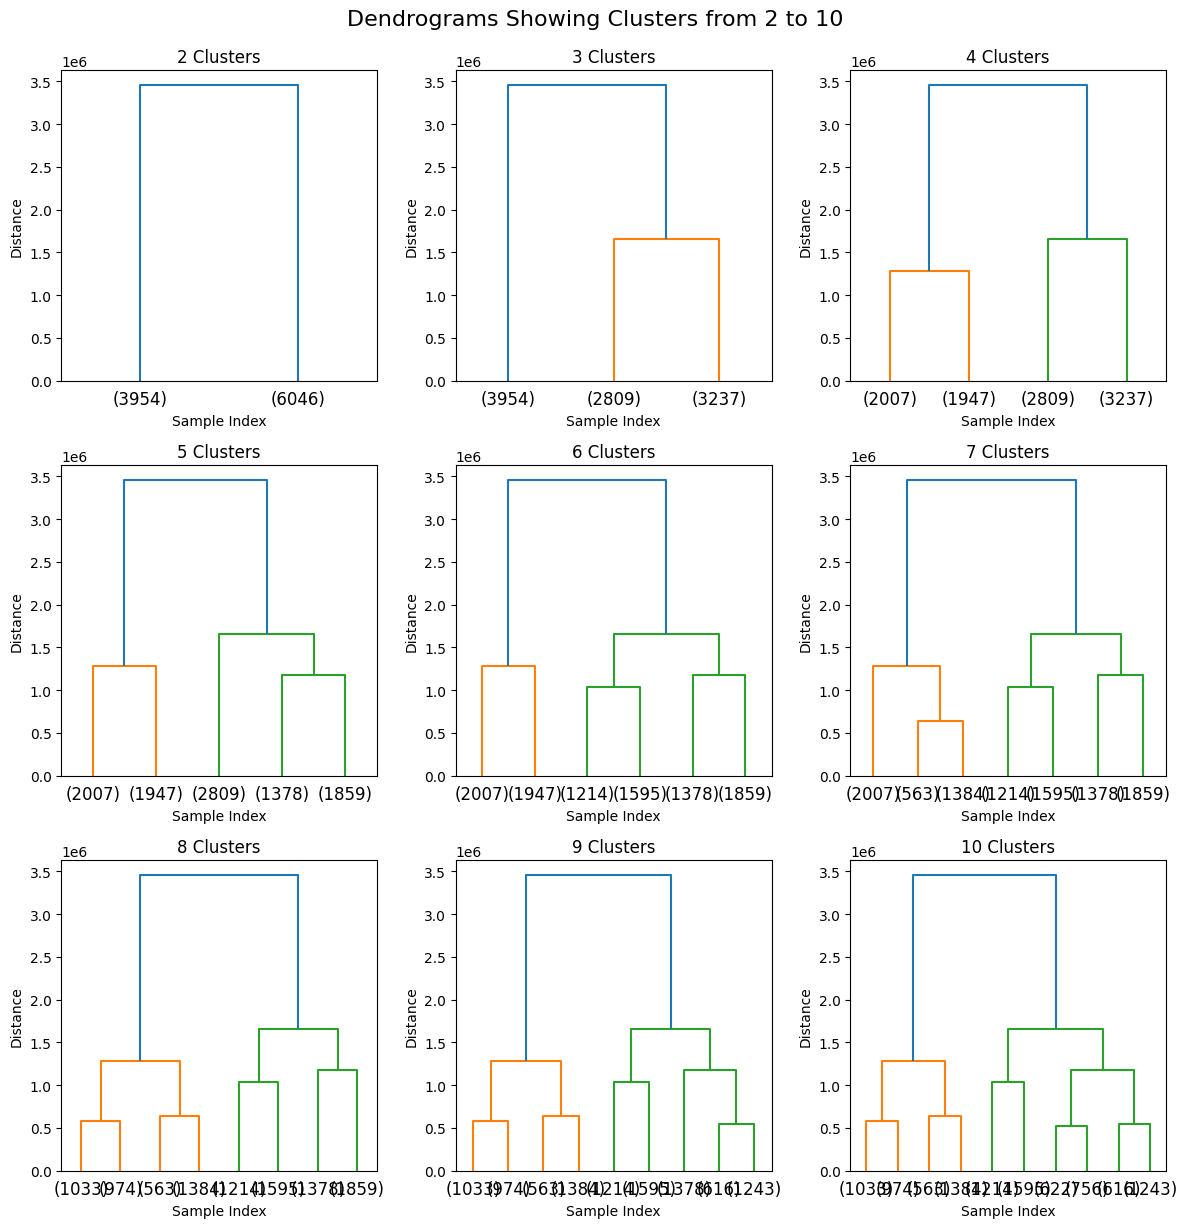

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Randomly select 10000 rows from all_data
sampled_data = all_data.sample(n=10000, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(sampled_data, method='ward')

# Create subplots for dendrograms showing clusters 2 to 10
fig, axes = plt.subplots(3, 3, figsize=(12, 12)) 

cluster_range = range(2, 11) 
axes = axes.flatten()

for i, num_clusters in enumerate(cluster_range):
    dendrogram(
        linkage_matrix,
        truncate_mode='lastp',
        p=num_clusters,
        show_leaf_counts=True,
        ax=axes[i]
    )
    axes[i].set_title(f'{num_clusters} Clusters')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.suptitle('Dendrograms Showing Clusters from 2 to 10', fontsize=16, y=1.02)
plt.show()

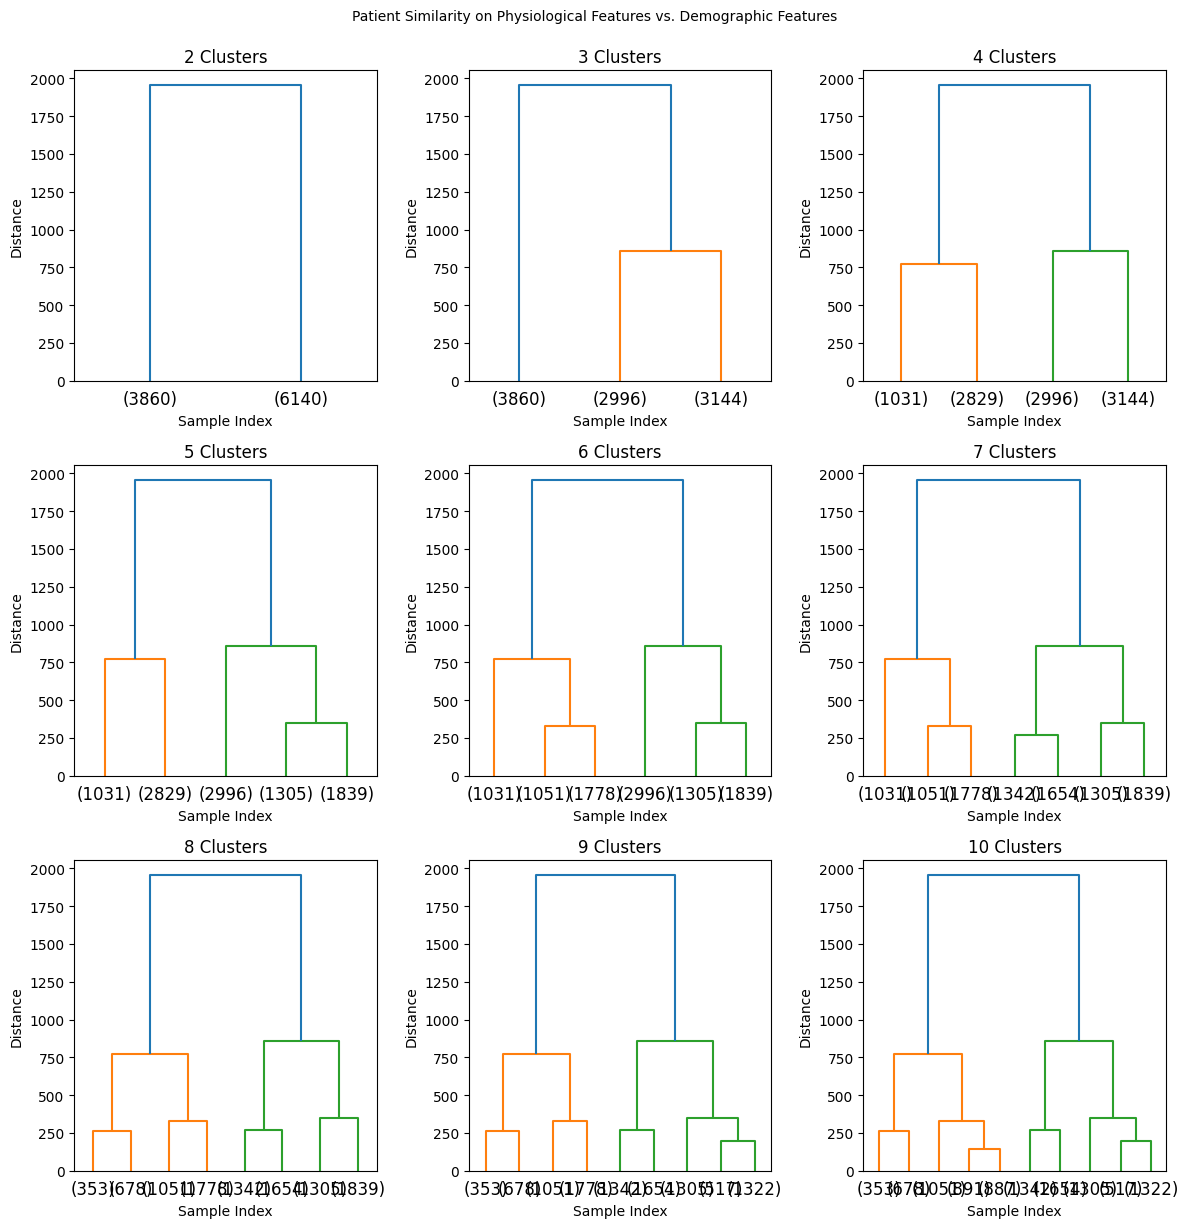

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Randomly select 10000 rows from all_data
sampled_data = all_data.sample(n=10000, random_state=42)

# select features
physiological_features = ["avg_white_blood_cells", "avg_sodium", "avg_blood_glucose", "avg_dias_press", "avg_hr"]
demographic_features = ["age", "gender", "marital_status", "ethnicity"]

selected_features = physiological_features + demographic_features

# calculate Linkage Matrix
linkage_matrix = sch.linkage(sampled_data[selected_features], method='ward') 

# create subplots for dendrograms showing clusters 2 to 10
fig, axes = plt.subplots(3, 3, figsize=(12, 12)) 

cluster_range = range(2, 11) 
axes = axes.flatten()

for i, num_clusters in enumerate(cluster_range):
    dendrogram(
        linkage_matrix,
        truncate_mode='lastp',
        p=num_clusters,
        show_leaf_counts=True,
        ax=axes[i]
    )
    axes[i].set_title(f'{num_clusters} Clusters')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.suptitle('Patient Similarity on Physiological Features vs. Demographic Features', fontsize=10, y=1.02)
plt.show()